## **Number Recognition**





**Author :- Thakurdas Mahato**

**Import all Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


#  Data preparation
##  Load data and Splitting the dataset

In [ ]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.Xlable()

5


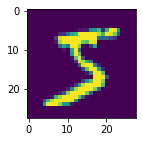

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
print(y_train[0])

 Normalization

**normalize to range [0..1]

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

##  Reshape

In [ ]:
#reshape dataset to have a single channel
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

#  Label encoding

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#  **Data Visualization**

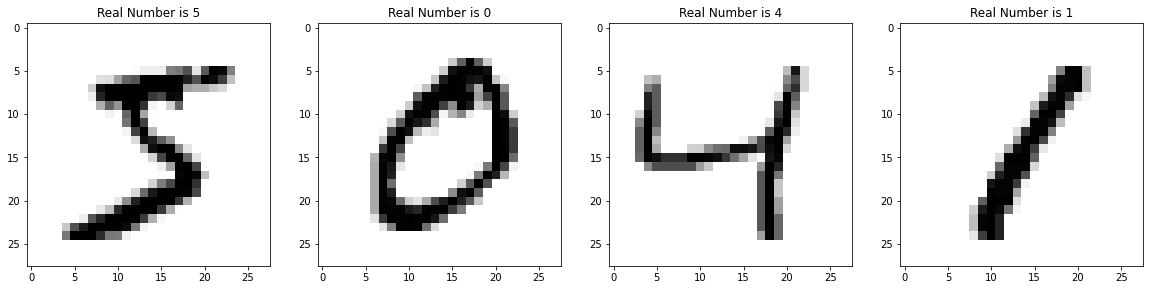

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

**Normalization**

In [ ]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

#  CNN
##  Define the model

**Model Definition**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                  

##  Model training

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 1, batch_size =16, verbose=True)

3750/3750 [==============================] - 465s 124ms/step - loss: 0.0570 - accuracy: 0.9827


**Plot CNN model**

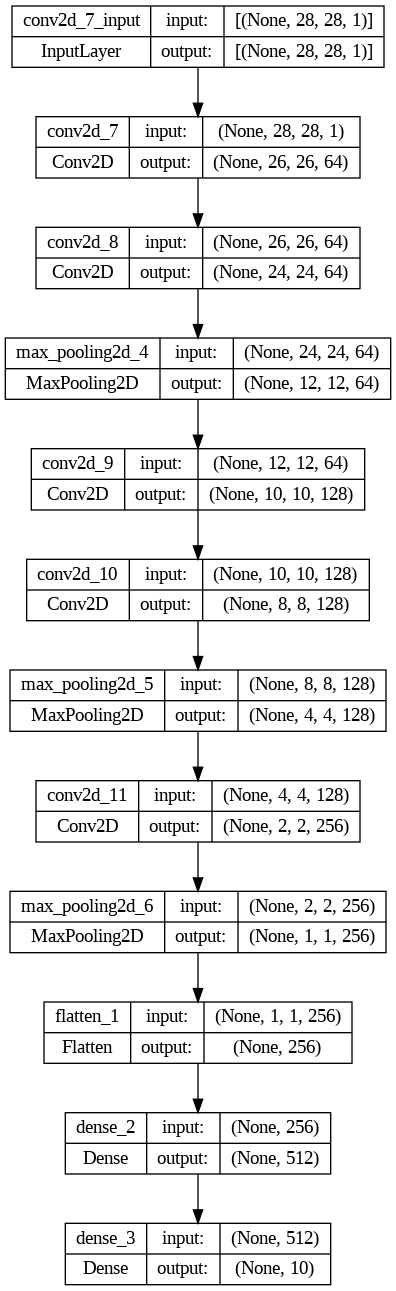

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

##  Confusion matrix

313/313 [==============================] - 17s 54ms/step


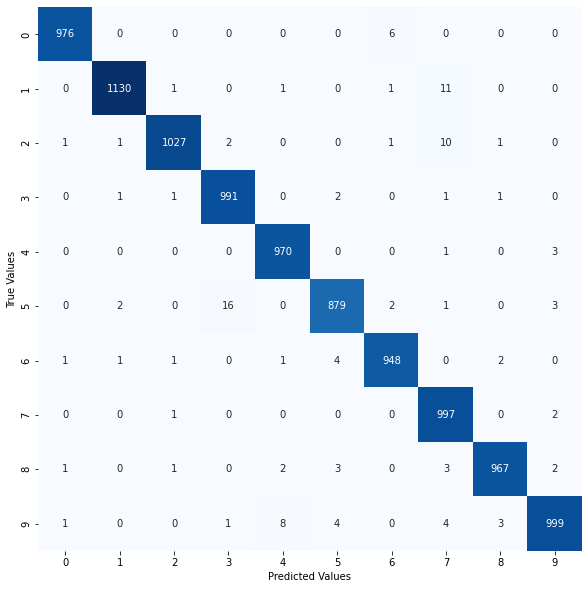

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#  Prediction

##  Prediction validation results

313/313 [==============================] - 18s 57ms/step


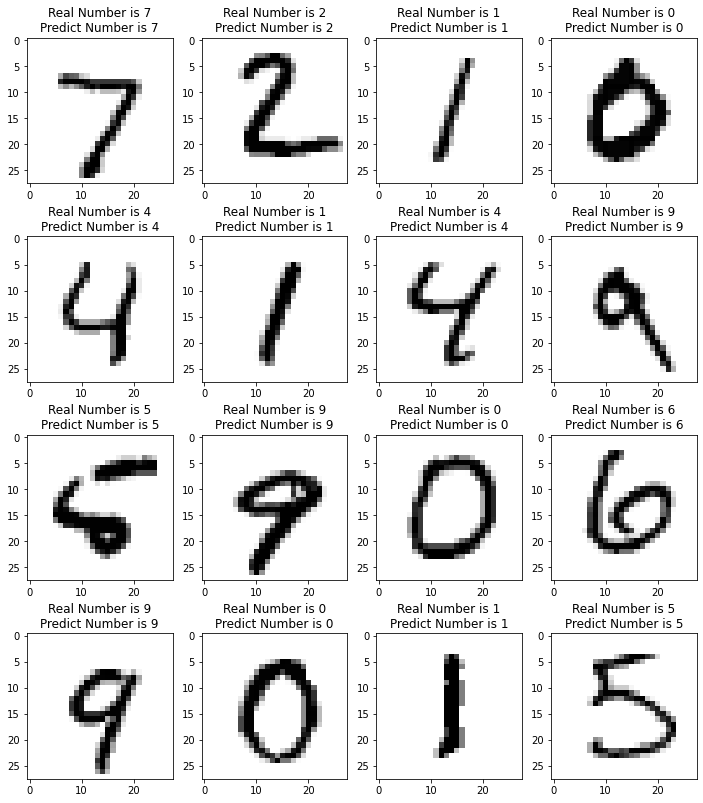

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");